<a href="https://colab.research.google.com/github/papillonsss-666/Nengo-Code-Example/blob/main/Neurons_with_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurons with Noise

In [ ]:
!pip install nengo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 8.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import math

import nengo
from nengo.dists import Choice
from nengo.processes import Piecewise
from nengo.utils.ensemble import response_curves, tuning_curves
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

## Input Function

In [ ]:
# Define a sine wave function
def sin(t):
  return abs(np.sin(4*t))+t/10

## Spike Train with Noise

In [ ]:
input_func = sin

In [ ]:
# Define a WhiteNoise nengo.Process
white_noise = nengo.processes.WhiteNoise(dist=nengo.dists.Gaussian(0, 0.1), seed=1)

In [ ]:
model = nengo.Network()
with model:
    # Input is a sin wave
    input = nengo.Node(input_func)

    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    ens_1 = nengo.Ensemble(30, dimensions=1, noise=white_noise)
    ens_1.encoders = Choice([[1]])
    # Here, the intercepts of the neurons are no longer constants.
    # The intercepts have a uniform distribution here
    ens_1.intercepts = nengo.dists.Uniform(0.3, 0.7)

    # Connect the input to the population
    nengo.Connection(input, ens_1, synapse = 0.01)

    # Create probes to collect the data
    input_probe = nengo.Probe(input)

    ens_1_probe = nengo.Probe(ens_1, synapse = 0.01)
    ens_1_spike = nengo.Probe(ens_1.neurons)

# Create simulator
with nengo.Simulator(model) as sim:
  sim.run(5)

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 462, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 385, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

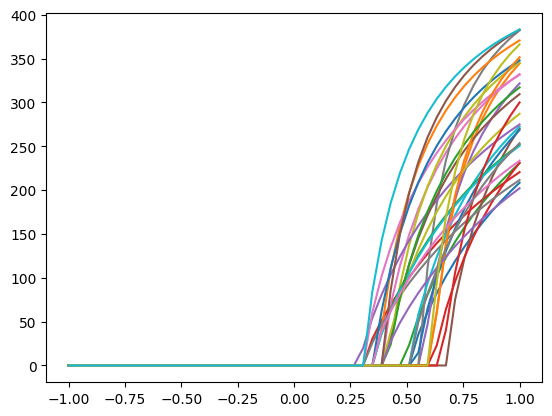

In [ ]:
# Tuning curve of the ensemble
# We can see the randomness of intercepts here
plt.figure()
plt.plot(*tuning_curves(ens_1, sim))
plt.show()

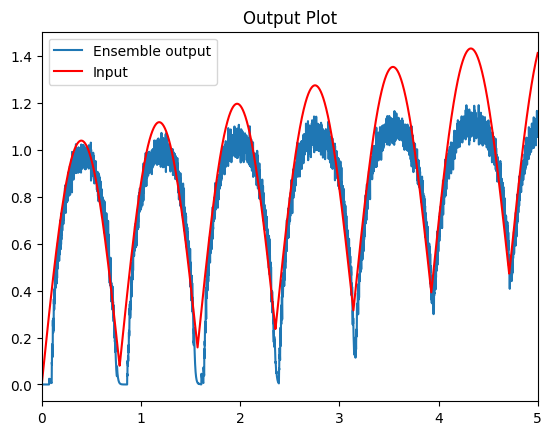

In [ ]:
plt.figure()
plt.plot(sim.trange(), sim.data[ens_1_probe], label="Ensemble output")
plt.plot(sim.trange(), sim.data[input_probe], "r", label="Input")
plt.xlim(0, 5)
plt.title("Output Plot")
plt.legend()
plt.show()

(0.0, 5.0)

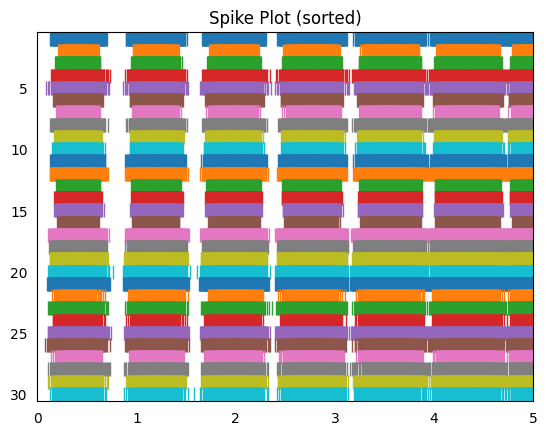

In [ ]:
# The spike trains are basically in the same position but have different width
indices = sorted_neurons(ens_1, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[ens_1_spike][:, indices])
plt.title("Spike Plot (sorted)")
plt.xlim(0, 5)